In [68]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Utilizando el dataset breast cancer
cancer = load_breast_cancer()

In [36]:
# dataset en formato tabular
pd.DataFrame(data=cancer.data,columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [47]:
# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test =train_test_split(cancer.data,cancer.target,random_state=1)

In [58]:
# Armando un simple arbol de decisión
treedes = DecisionTreeClassifier(max_depth=2, random_state=0)

In [59]:
treedes.fit(X_train, y_train)
print('Precisión modelo inicial train/test {0:.3f}/{1:.3f}'.format(treedes.score(X_train, y_train),treedes.score(X_test, y_test)))

Precisión modelo inicial train/test 0.962/0.888


[Text(0.5, 0.8333333333333334, 'worst perimeter <= 106.05\ngini = 0.465\nsamples = 426\nvalue = [157, 269]'),
 Text(0.25, 0.5, 'worst concave points <= 0.159\ngini = 0.067\nsamples = 259\nvalue = [9, 250]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.031\nsamples = 253\nvalue = [4, 249]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.5, 'worst texture <= 20.645\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.375\nsamples = 16\nvalue = [4, 12]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.088\nsamples = 151\nvalue = [144, 7]')]

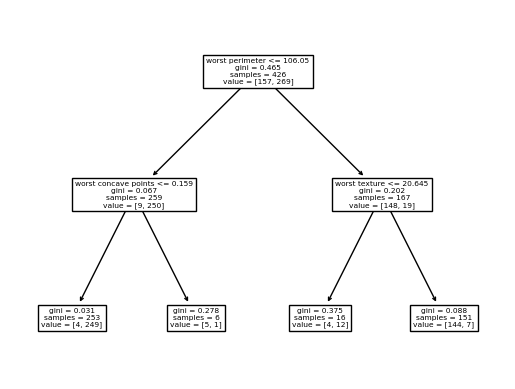

In [61]:
from sklearn import tree
tree.plot_tree(treedes, feature_names=cancer.feature_names)

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
ada = AdaBoostClassifier(base_estimator=treedes,n_estimators=1000,learning_rate=1.5,random_state=1)

In [79]:
# Ajustando los datos
ada = ada.fit(X_train, y_train)

# Imprimir la precisión.
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Precisión modelo con AdaBoost train/test{0:.3f}/{1:.3f}'.format(ada_train, ada_test))

C:\Users\Rodrigo\anaconda3\envs\PR_NE\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión modelo con AdaBoost train/test1.000/0.958
